In [2]:
# LI_sherry_LAB1.ipynb
"""
Requirements
Share your completed notebook as an 'ipynp' file. 
Take screenshots in Python to show you’ve completed all the steps and add them into a PDF document. 
Include a few sentences describing each screenshot and summarize the data according to the directions in the lab guide. 
Be sure to follow the formatting guidelines below.

Use 12-point, Times New Roman family fonts, 2.0 line spacing, and 1 inch margins all around.
Use caption labels (Figure 1, Table 1, etc.) and short descriptions for figures and tables. 
Cite the screenshots, figures, or tables consistently in the text (exa: As seen in Figure 1 below, ...).


Guide:
Use Python in Google Colab to download your dataset "Cereals.csv", to explore and summarize the data as follows:

Summary of Statistics
Compute the mean, median, min, max and standard deviation for each cereal on the quantitative variables. 

Correlation
Compute the correlation table for only the quantitative variables.

Histogram Visualization
Draw by hand or with an application program a histogram for the ‘rating’ variables. 

"""

# Python Packages needed
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [3]:
# read csv data into df
url = "https://docs.google.com/spreadsheets/d/1dqoV22kEcC6R313KcHzZdp80-43W61AZL_Mg7uFlHXI/gviz/tq?tqx=out:csv"
df = pd.read_csv(url)

print(df.head())

                        name mfr type  calories  protein  fat  sodium  fiber  \
0                  100%_Bran   N    C        70        4    1     130   10.0   
1          100%_Natural_Bran   Q    C       120        3    5      15    2.0   
2                   All-Bran   K    C        70        4    1     260    9.0   
3  All-Bran_with_Extra_Fiber   K    C        50        4    0     140   14.0   
4             Almond_Delight   R    C       110        2    2     200    1.0   

   carbo  sugars  potass  vitamins  shelf  weight  cups     rating  
0    5.0     6.0   280.0        25      3     1.0  0.33  68.402973  
1    8.0     8.0   135.0         0      3     1.0  1.00  33.983679  
2    7.0     5.0   320.0        25      3     1.0  0.33  59.425505  
3    8.0     0.0   330.0        25      3     1.0  0.50  93.704912  
4   14.0     8.0     NaN        25      3     1.0  0.75  34.384843  


In [4]:
# check data types
print (df.dtypes)

name         object
mfr          object
type         object
calories      int64
protein       int64
fat           int64
sodium        int64
fiber       float64
carbo       float64
sugars      float64
potass      float64
vitamins      int64
shelf         int64
weight      float64
cups        float64
rating      float64
dtype: object


In [5]:
# data shape
df.shape

(77, 16)

In [6]:
# check missing values
# carbo, sugars, potass have missing values
#print(df.count())
#print(df.isnull().sum())
#print(df.isnull().any())
print(df.isna().sum())

name        0
mfr         0
type        0
calories    0
protein     0
fat         0
sodium      0
fiber       0
carbo       1
sugars      1
potass      2
vitamins    0
shelf       0
weight      0
cups        0
rating      0
dtype: int64


In [7]:
# count affected rows and columns if we replace the missing values with mean
rows_with_replacement = np.sum(df.isna().any(axis=1))
cols_with_replacement = np.sum(df.isna().any(axis=0))
print(f"Rows affected: {rows_with_replacement}")
print(f"Columns affected: {cols_with_replacement}")

Rows affected: 3
Columns affected: 3


In [8]:
# Count missing values before replacement
missing_before = df.isna().sum().sum()

# Replace missing values with mean for only carbo, sugars, potass
# Since only carbo, sugars, and potass have missing values, we can limit the replacement to these columns
for col in ['carbo', 'sugars', 'potass']:
    df[col] = df[col].fillna(df[col].mean())

# Count missing values after replacement (should be 0)
missing_after = df.isna().sum().sum()

# Number of replaced values
print(f"Number of replaced values: {missing_before}")
print(f"Number of null values after: {missing_after}")

Number of replaced values: 4
Number of null values after: 0


In [ ]:
"""
1. Summary of Statistics
Compute the mean, median, min, max and standard deviation for each cereal on the quantitative variables.

2. Correlation
Compute the correlation table for only the quantitative variables.

3. Histogram Visualization
Draw by hand or with an application program a histogram for the ‘rating’ variables.
"""

In [9]:
# 1. Summary of Statistics
# Compute the mean, median, min, max and standard deviation 
# for each cereal on the quantitative variables.

# Select only numeric (quantitative) columns
quant_vars = df.select_dtypes(include="number")

# Compute summary statistics
summary = pd.DataFrame({
    "mean": quant_vars.mean(),
    "median": quant_vars.median(),
    "min": quant_vars.min(),
    "max": quant_vars.max(),
    "std": quant_vars.std()
})

print(summary)

                mean      median        min         max        std
calories  106.883117  110.000000  50.000000  160.000000  19.484119
protein     2.545455    3.000000   1.000000    6.000000   1.094790
fat         1.012987    1.000000   0.000000    5.000000   1.006473
sodium    159.675325  180.000000   0.000000  320.000000  83.832295
fiber       2.151948    2.000000   0.000000   14.000000   2.383364
carbo      14.802632   14.802632   5.000000   23.000000   3.881534
sugars      7.026316    7.000000   0.000000   15.000000   4.349754
potass     98.666667   90.000000  15.000000  330.000000  69.478004
vitamins   28.246753   25.000000   0.000000  100.000000  22.342523
shelf       2.207792    2.000000   1.000000    3.000000   0.832524
weight      1.029610    1.000000   0.500000    1.500000   0.150477
cups        0.821039    0.750000   0.250000    1.500000   0.232716
rating     42.665705   40.400208  18.042851   93.704912  14.047289


In [10]:
# 2. Compute correlation table: Pearson correlation coefficient (values from -1 to 1)
corr_table = quant_vars.corr()

print(corr_table)

          calories   protein       fat    sodium     fiber     carbo  \
calories  1.000000  0.019066  0.498610  0.300649 -0.293413  0.257423   
protein   0.019066  1.000000  0.208431 -0.054674  0.500330 -0.024160   
fat       0.498610  0.208431  1.000000 -0.005407  0.016719 -0.298074   
sodium    0.300649 -0.054674 -0.005407  1.000000 -0.070675  0.290399   
fiber    -0.293413  0.500330  0.016719 -0.070675  1.000000 -0.380223   
carbo     0.257423 -0.024160 -0.298074  0.290399 -0.380223  1.000000   
sugars    0.566062 -0.281905  0.300552  0.057425 -0.138711 -0.471184   
potass   -0.071991  0.562143  0.197823 -0.042312  0.908647 -0.358557   
vitamins  0.265356  0.007335 -0.031156  0.361477 -0.032243  0.216854   
shelf     0.097234  0.133865  0.263691 -0.069719  0.297539 -0.189928   
weight    0.696091  0.216158  0.214625  0.308576  0.247226  0.138432   
cups      0.087200 -0.244469 -0.175892  0.119665 -0.513061  0.366427   
rating   -0.689376  0.470618 -0.409284 -0.401295  0.584160  0.08

In [11]:
# 3. Histogram Visualization
# Draw by hand or with an application program a histogram for the ‘rating’ variables.
# tallying how many cereals fall into ranges like 10–20, 20–30, 30–40, etc.

# Define bins
bins = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

# Cut ratings into bins
df['rating_bin'] = pd.cut(df['rating'], bins=bins, right=False)  
# right=False means intervals are left-closed (e.g., 10–20 includes 10, excludes 20)

# Count frequencies
freq_table = df['rating_bin'].value_counts().sort_index()

print(freq_table)

rating_bin
[10, 20)      2
[20, 30)     11
[30, 40)     24
[40, 50)     19
[50, 60)     13
[60, 70)      5
[70, 80)      2
[80, 90)      0
[90, 100)     1
Name: count, dtype: int64


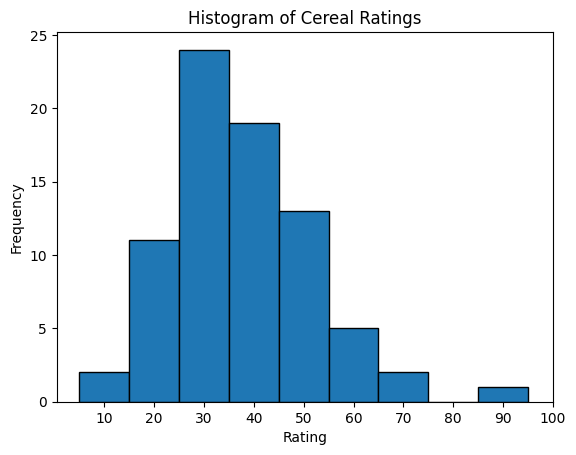

In [13]:
# 4. Histogram Visualization
# Alternatively draw histogram using matplotlib for the ‘rating’ variable.

# Define the bin edges (10 to 100, step of 10)
bins = list(range(10, 101, 10))   # [10, 20, 30, ..., 100]

plt.hist(df["rating"], bins=bins, edgecolor="black", align="left")
plt.title("Histogram of Cereal Ratings")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.xticks(bins)  # put tick marks at each bin edge
plt.show()
